In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds = pd.read_csv('data/SVR.csv')

In [3]:
ds.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
x = ds.iloc[:, 1:2].values
y = ds.iloc[:, 2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

from sklearn.svm import SVR

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc_x = StandardScaler()

In [7]:
sc_y = StandardScaler()

In [8]:
x = sc_x.fit_transform(x)

In [9]:
y = y.reshape(-1, 1)

In [10]:
y = sc_y.fit_transform(y)

In [11]:
from sklearn.svm import SVR

In [12]:
regressor = SVR(kernel='rbf')

In [13]:
regressor.fit(x, y)

/Users/poomwarawat/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))

In [26]:
y_pred

array([170370.0204065])

Text(0, 0.5, 'Salary')

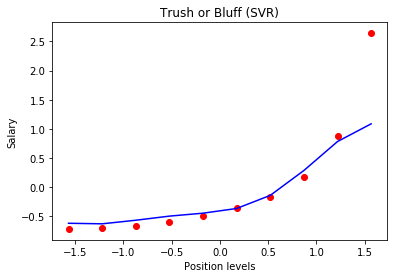

In [27]:
plt.scatter(x, y, color="red")
plt.plot(x, regressor.predict(x), color="blue")
plt.title("Trush or Bluff (SVR)")
plt.xlabel("Position levels")
plt.ylabel("Salary")